# K Nearest Neighbors (KNN) 

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,  precision_score, recall_score, 
f1_score, auc, log_loss, roc_auc_score, roc_curve, precision_recall_curve, plot_precision_recall_curve)

In [98]:
wine = datasets.load_wine()

In [99]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [100]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [101]:
X = wine.data
y = wine.target

X.shape, y.shape

((178, 13), (178,))

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y) 

# Generating Model for K=3

In [103]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [105]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.6851851851851852


# Generating Model for K=5

In [106]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [107]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7222222222222222


# Generating Model for K=7

In [108]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [109]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7407407407407407


In [110]:
# Here, you have increased the number of neighbors in the model and accuracy got increased. 
# But, this is not necessary for each case that an increase in many neighbors increases the accuracy

# How to improve KNN

In [111]:
# One of the approach is Standardization

from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [113]:
X_scaled[0]

array([ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
        0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
        0.36217728,  1.84791957,  1.01300893])

In [114]:
X[0]

# we can see that above data is scaled now. X is original data. X_scaled is scaled data. 

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [115]:
# Now let's do the split, train, fit and check the accuracy using scaled data. 

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 0, stratify = y)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9629629629629629


# Finding Best Value For K

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
k_neighbors = list(range(1, 50, 2))

cv_scores = []

for k in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [119]:
k_neighbors

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [120]:
cv_scores[0:5]

[0.9434640522875817,
 0.9545751633986927,
 0.9604575163398692,
 0.9663398692810456,
 0.9718954248366012]

In [121]:
len(k_neighbors), len(cv_scores)

(25, 25)

In [122]:
# cross_val_score method above we have given the scoring method as accuracy. So 1-accuracy will be the error of 
# prediction. 

Error = [1 - x for x in cv_scores]
Error[: 5]

[0.05653594771241832,
 0.04542483660130725,
 0.0395424836601308,
 0.03366013071895435,
 0.028104575163398815]

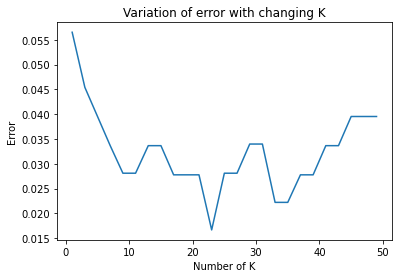

In [123]:
# Now we will try to plot for variation of error with changing value of K

plt.plot(neighbors, Error)
plt.xlabel('Number of K')
plt.ylabel('Error')
plt.title('Variation of error with changing K')
plt.show()

In [124]:
# optimal value for K means the K value having least error. 

optimal_k = k_neighbors[MSE.index(min(Error))]

print('The optimal number of k is: ', optimal_k)

The optimal number of k is:  23


In [125]:
# Now we will find the accuracy of predicted values with above optimal value for K

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 0, stratify = y)

knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9814814814814815


In [127]:
# we can see that accuracy has increased to 98%

In [128]:
def classification_metrics_udf(y_test, y_predict):
    
    print("Confusion Matrix :\n\n", confusion_matrix(y_test,y_predict))
    
    print("\n\n Classification Report: \n\n", classification_report(y_test, y_predict))
    
    print("\n\n Accuracy Score: \n\n", accuracy_score(y_test, y_predict)) 

    print("\n\n Missclassfication Rate: \n\n", 1 - accuracy_score(y_test, y_predict))

    # we can enable the below ones if it's binary classification problem. 
    # For multile class classification below needs some tweaking. Pls refer to word doc. 
    
    #print("\n\n Recall Score: \n\n", recall_score(y_test, y_predict))

    #print("\n\n Precision Score: \n\n", precision_score(y_test, y_predict))

    #print("\n\n f1 Score: \n\n", f1_score(y_test, y_predict)) 

    #print("\n\n roc_auc_score:\n\n", roc_auc_score(y_test, y_predict))
    

In [129]:
classification_metrics_udf(y_test, y_predict)

Confusion Matrix :

 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


 Classification Report: 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



 Accuracy Score: 

 0.9814814814814815


 Missclassfication Rate: 

 0.01851851851851849
